다중 선형 회귀 (Multiple Linear Regression)


다중 선형 회귀란?


다중 선형 회귀는 여러 개의 독립 변수(특성)를 사용해 하나의 종속 변수를 예측하는 모델입니다.


단순 선형 회귀가 '공부 시간'만으로 '점수'를 예측했다면, 다중 선형 회귀는 '공부 시간', '수면 시간', '집중력' 등 여러 요인을 종합하여 '점수'를 예측하는 방식입니다.

데이터가 가진 다양한 정보를 모두 활용하므로, 단순 선형 회귀보다 더 정확한 예측이 가능합니다.



다중 선형 회귀의 원리


이 모델은 데이터를 가장 잘 설명하는 '평면' 또는 **'초평면(Hyperplane)'**을 찾는 것을 목표로 합니다. 

단순 선형 회귀가 직선을 찾는 것과 같은 원리지만, 차원만 확장된 형태입니다.


모델이 찾는 방정식은 아래와 같이 표현됩니다.

y=w 
1
​
 x 
1
​
 +w 
2
​
 x 
2
​
 +...+w 
n
​
 x 
n
​
 +b
y: 예측하려는 값 (예: 집값)

x 
1
​
 ,x 
2
​
 ,...,x 
n
​
 : 입력 특성들 (예: 집 크기, 방 개수, 위치 등)

w 
1
​
 ,w 
2
​
 ,...,w 
n
​
 : 각 특성(x)에 곱해지는 가중치(Weight). 각 특성의 중요도를 나타냅니다.

b: y절편(Bias)

모델은 최적의 w와 b 값을 찾아 모든 특성이 예측에 미치는 영향을 파악합니다.

예시
단순 선형 회귀: 집 크기(x 
1
​
 )만으로 집값(y)을 예측 (y=w 
1
​
 x 
1
​
 +b)

다중 선형 회귀: 집 크기(x 
1
​
 )와 방 개수(x 
2
​
 )를 모두 사용하여 집값(y)을 예측 (y=w 
1
​
 x 
1
​
 +w 
2
​
 x 
2
​
 +b)

In [1]:
# 필요한 라이브러리를 임포트합니다.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# 1. 예제용 가상의 다중 특성 데이터셋을 생성합니다.
# `n_features`를 5로 설정하여 5개의 특성을 가진 데이터를 만듭니다.
# `n_informative`는 정답을 예측하는 데 실제로 유용한 특성의 개수입니다.
X, y = make_regression(
    n_samples=100,           # 샘플(데이터)의 개수
    n_features=5,            # 특성(컬럼)의 개수 (5개)
    n_informative=3,         # 이 중 3개의 특성만 정답과 관련이 있습니다.
    noise=20,                # 데이터에 추가할 무작위 노이즈의 정도
    random_state=42
)
print("다중 특성을 가진 데이터셋 준비 완료.")
print(f"특성(X) 데이터 형태: {X.shape}") # 100행 5열의 데이터임을 확인합니다.
print("-" * 50)

# 2. 훈련 세트와 테스트 세트로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 테스트 세트의 비율
    random_state=42
)

# 3. 다중 선형 회귀 모델을 생성하고 훈련합니다.
# LinearRegression는 모델을 만드는 '설계도(클래스)'입니다.
# model = LinearRegression()는 그 설계도에 따라 '실제 모델(객체)'을 만드는 과정입니다.
# 이렇게 만들어진 model 객체에 학습 결과(가중치, 절편)가 저장됩니다.
model = LinearRegression()
# 훈련 데이터(X_train, y_train)를 사용해 모델을 학습시킵니다.
model.fit(X_train, y_train)

print("다중 선형 회귀 모델 훈련 완료.")
print("-" * 50)

# 4. 모델이 학습한 가중치와 절편을 확인합니다.
# `model.coef_`는 각 특성에 대한 가중치(기울기)를 배열 형태로 보여줍니다.
# `model.intercept_`는 절편(y절편)입니다.
print("모델이 학습한 가중치(w)와 절편(b):")
for i, coef in enumerate(model.coef_):
    print(f"특성 {i+1}의 가중치: {coef:.2f}")

print(f"\n절편(b): {model.intercept_:.2f}")
print("-" * 50)

# 5. 모델의 성능을 평가합니다.
# score() 함수는 R^2(결정계수)를 반환합니다.
print(f"모델의 결정계수(R^2): {model.score(X_test, y_test):.4f}")


다중 특성을 가진 데이터셋 준비 완료.
특성(X) 데이터 형태: (100, 5)
--------------------------------------------------
다중 선형 회귀 모델 훈련 완료.
--------------------------------------------------
모델이 학습한 가중치(w)와 절편(b):
특성 1의 가중치: 57.33
특성 2의 가중치: 34.95
특성 3의 가중치: -1.47
특성 4의 가중치: 61.42
특성 5의 가중치: -2.40

절편(b): -0.60
--------------------------------------------------
모델의 결정계수(R^2): 0.9353


2개의 특성을 가진 데이터셋 준비 완료.
--------------------------------------------------
다중 선형 회귀 모델 훈련 완료.
특성 1의 가중치: 84.27
특성 2의 가중치: 74.16
절편: 0.43
--------------------------------------------------


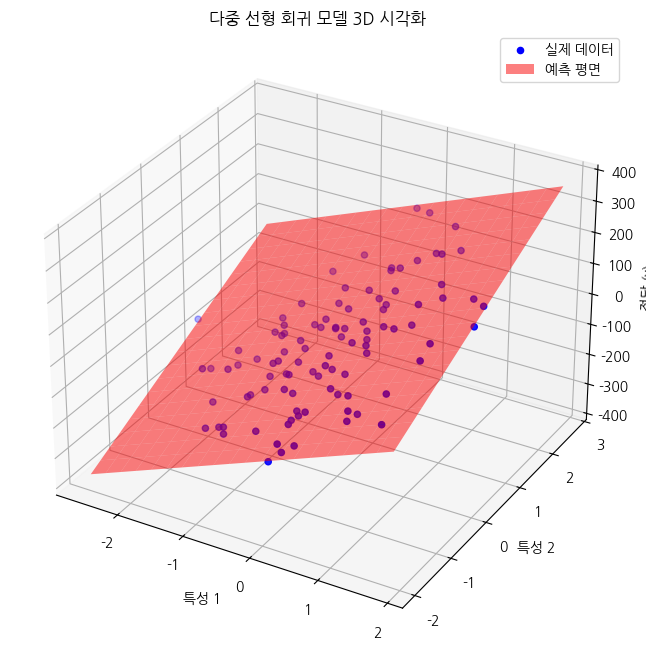

In [1]:
# 필요한 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D 그래프를 그리기 위한 모듈입니다.
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# matplotlib에서 한글을 사용하기 위한 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 시각화를 위해 2개의 특성을 가진 가상 데이터셋을 생성합니다.
X, y = make_regression(
    n_samples=100,
    n_features=2,            # 특성의 개수를 2개로 설정합니다.
    n_informative=2,
    noise=20,
    random_state=42
)
print("2개의 특성을 가진 데이터셋 준비 완료.")
print("-" * 50)

# 2. 다중 선형 회귀 모델을 훈련합니다.
model = LinearRegression()
model.fit(X, y)

print("다중 선형 회귀 모델 훈련 완료.")
print(f"특성 1의 가중치: {model.coef_[0]:.2f}")
print(f"특성 2의 가중치: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")
print("-" * 50)

# 3. 모델의 결과를 3D로 시각화합니다.
# 3-1. 3D 그래프를 그리기 위한 설정을 합니다.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3-2. 원래 데이터 포인트를 3D 산점도로 그립니다.
ax.scatter(X[:, 0], X[:, 1], y, label='실제 데이터', color='blue')

# 3-3. 예측 평면을 만들기 위해 x와 y축 범위를 설정합니다.
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
x1_surface, x2_surface = np.meshgrid(
    np.linspace(x1_min, x1_max, 20),
    np.linspace(x2_min, x2_max, 20)
)
# 예측 평면의 z값을 계산합니다.
z_surface = model.intercept_ + model.coef_[0] * x1_surface + model.coef_[1] * x2_surface

# 3-4. 예측 평면을 3D 그래프에 그립니다.
ax.plot_surface(x1_surface, x2_surface, z_surface, color='red', alpha=0.5, label='예측 평면')

# 3-5. 그래프에 제목과 축 이름을 설정합니다.
ax.set_title("다중 선형 회귀 모델 3D 시각화")
ax.set_xlabel("특성 1")
ax.set_ylabel("특성 2")
ax.set_zlabel("정답 (y)")
ax.legend()
plt.show()
